In [42]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [43]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [44]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [45]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [46]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


618

In [47]:
cities

['butaritari',
 'san patricio',
 'moussoro',
 'chikoy',
 'hobart',
 'hilo',
 'arraial do cabo',
 'vaini',
 'new norfolk',
 'esfarayen',
 'ushuaia',
 'souillac',
 'cidreira',
 'clyde river',
 'bengkulu',
 'cape town',
 'taolanaro',
 'codrington',
 'comodoro rivadavia',
 'tornio',
 'poronaysk',
 'norman wells',
 'roald',
 'albany',
 'mataura',
 'jacareacanga',
 'port lincoln',
 'witu',
 'belmonte',
 'suez',
 'indramayu',
 'chapleau',
 'hasaki',
 'puerto ayora',
 'ribeira grande',
 'punta arenas',
 'barrow',
 'tyukalinsk',
 'mezen',
 'nikolskoye',
 'ketchikan',
 'galgani',
 'busselton',
 'erdenet',
 'narsaq',
 'saint-georges',
 'marfino',
 'mar del plata',
 'barentsburg',
 'bethel',
 'rikitea',
 'iqaluit',
 'kapaa',
 'georgetown',
 'margate',
 'saint-philippe',
 'belushya guba',
 'kahului',
 'conway',
 'kawana waters',
 'zacapu',
 'moose factory',
 'kaitangata',
 'maddur',
 'tocopilla',
 'nizhniy tsasuchey',
 'chokurdakh',
 'illoqqortoormiut',
 'port blair',
 'fort-shevchenko',
 'jumla',


In [48]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [49]:
# Create an endpoint URL for a city.
#city_url = url + "&q="

#city_weather = requests.get(url)

#city_weather.json()

In [50]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | moussoro
Processing Record 4 of Set 1 | chikoy
City not found. Skipping...
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | esfarayen
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | comodoro rivadavia
Processing Record 20 of Set 1 | tornio
Processing Record 21 of Set 1 | poronaysk
Processing 

Processing Record 37 of Set 4 | cabo rojo
Processing Record 38 of Set 4 | half moon bay
Processing Record 39 of Set 4 | nanchong
Processing Record 40 of Set 4 | montevideo
Processing Record 41 of Set 4 | sovetskiy
Processing Record 42 of Set 4 | port hardy
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | odienne
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | mahendranagar
Processing Record 47 of Set 4 | stillwater
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | kenora
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | wad rawah
Processing Record 3 of Set 5 | sompeta
Processing Record 4 of Set 5 | blagoveshchenka
Processing Record 5 of Set 5 | tigil
Processing Record 6 of Set 5 | zyryanka
Processing Record 7 of Set 5 | dibulla
Processing Record 8 of Set 5 | san cristobal
Processing Record 9 of Set 5 | perth
Processing Record 10 of S

Processing Record 31 of Set 8 | katsuura
Processing Record 32 of Set 8 | sambava
Processing Record 33 of Set 8 | ust-tsilma
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | la rioja
Processing Record 37 of Set 8 | nanortalik
Processing Record 38 of Set 8 | aasiaat
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | brandon
Processing Record 41 of Set 8 | krasnoselkup
Processing Record 42 of Set 8 | hovd
Processing Record 43 of Set 8 | gangapur
Processing Record 44 of Set 8 | mundu
Processing Record 45 of Set 8 | waddan
Processing Record 46 of Set 8 | lasa
Processing Record 47 of Set 8 | morro da fumaca
Processing Record 48 of Set 8 | kachhwa
Processing Record 49 of Set 8 | kondagaon
Processing Record 50 of Set 8 | hornepayne
Processing Record 1 of Set 9 | kolimvari
City not found. Skipping...
Processing Record 2 of Set 9 | sao joao da barra
Processing Record 3 of Set 9 | igua

Processing Record 21 of Set 12 | rosa zarate
Processing Record 22 of Set 12 | yian
City not found. Skipping...
Processing Record 23 of Set 12 | chumikan
Processing Record 24 of Set 12 | saint-pierre
Processing Record 25 of Set 12 | arequipa
Processing Record 26 of Set 12 | seymchan
Processing Record 27 of Set 12 | wroclaw
Processing Record 28 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 12 | udimskiy
Processing Record 30 of Set 12 | glogow
Processing Record 31 of Set 12 | goundam
Processing Record 32 of Set 12 | sataua
City not found. Skipping...
Processing Record 33 of Set 12 | koungou
Processing Record 34 of Set 12 | avera
Processing Record 35 of Set 12 | port hedland
Processing Record 36 of Set 12 | alta floresta
Processing Record 37 of Set 12 | taber
Processing Record 38 of Set 12 | maragogi
Processing Record 39 of Set 12 | malkangiri
Processing Record 40 of Set 12 | mount pleasant
Processing Record 41 of Set 12 | omboue
Processing Record 42 of Set 1

In [55]:
len(city_data)

575

In [56]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,83.66,75,29,16.46,KI,2021-07-22 21:04:42
1,San Patricio,28.0170,-97.5169,89.49,50,72,14.67,US,2021-07-22 21:04:42
2,Moussoro,13.6408,16.4901,81.27,64,100,7.61,TD,2021-07-22 21:04:43
3,Hobart,-42.8794,147.3294,51.26,68,75,4.00,AU,2021-07-22 21:04:43
4,Hilo,19.7297,-155.0900,78.53,83,90,11.50,US,2021-07-22 21:02:14
5,Arraial Do Cabo,-22.9661,-42.0278,68.32,71,1,9.91,BR,2021-07-22 21:03:02
6,Vaini,-21.2000,-175.2000,78.96,89,20,8.05,TO,2021-07-22 21:04:44
7,New Norfolk,-42.7826,147.0587,50.92,71,100,1.01,AU,2021-07-22 21:04:44
8,Esfarayen,37.0765,57.5101,76.80,22,23,4.63,IR,2021-07-22 21:04:45
9,Ushuaia,-54.8000,-68.3000,42.46,65,40,5.75,AR,2021-07-22 21:04:44


In [57]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-07-22 21:04:42,3.0707,172.7902,83.66,75,29,16.46
1,San Patricio,US,2021-07-22 21:04:42,28.0170,-97.5169,89.49,50,72,14.67
2,Moussoro,TD,2021-07-22 21:04:43,13.6408,16.4901,81.27,64,100,7.61
3,Hobart,AU,2021-07-22 21:04:43,-42.8794,147.3294,51.26,68,75,4.00
4,Hilo,US,2021-07-22 21:02:14,19.7297,-155.0900,78.53,83,90,11.50


In [58]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

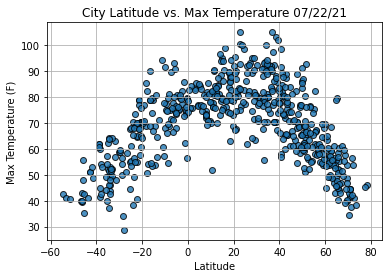

In [60]:
# Import time module
import time
%matplotlib inline

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

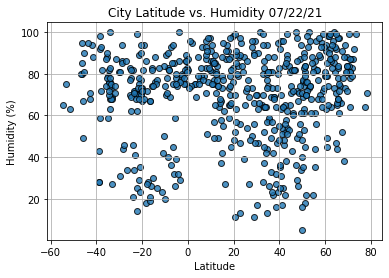

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


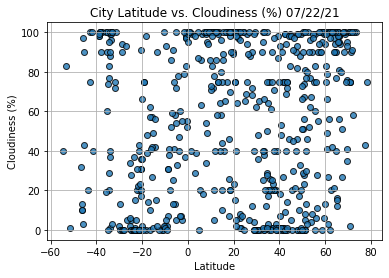

In [62]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


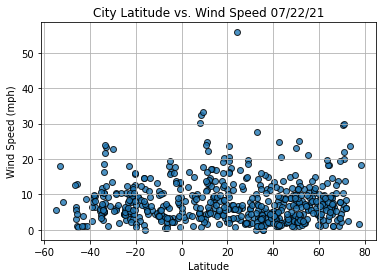

In [63]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [76]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [77]:
index13 = city_data_df.loc[13]
index13

City                     Bengkulu
Country                        ID
Date          2021-07-22 21:03:13
Lat                       -3.8004
Lng                      102.2655
Max Temp                    75.02
Humidity                       86
Cloudiness                     47
Wind Speed                   3.49
Name: 13, dtype: object

In [91]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


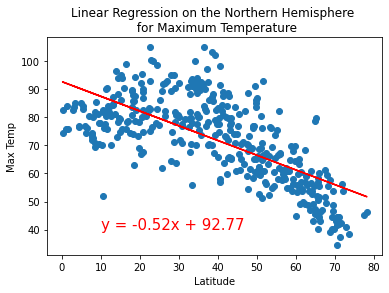

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))
plt.show()

In [93]:
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.690


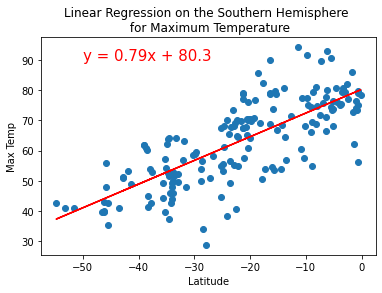

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


In [95]:
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.756


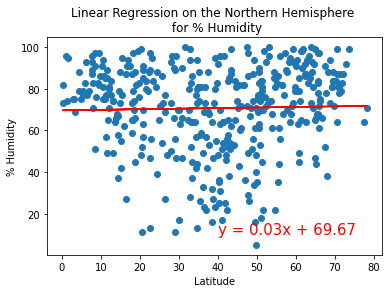

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


In [105]:
# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.026


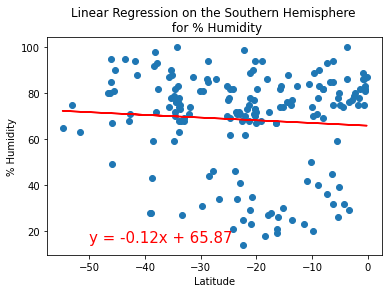

In [106]:
# Linear regression on the Southern Hemisphere for Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


In [108]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.074


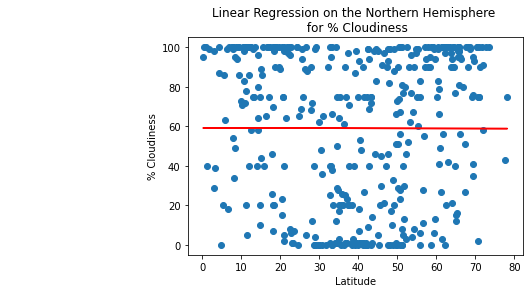

In [115]:
# Linear regression on the Northern Hemisphere for Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))




In [116]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.002


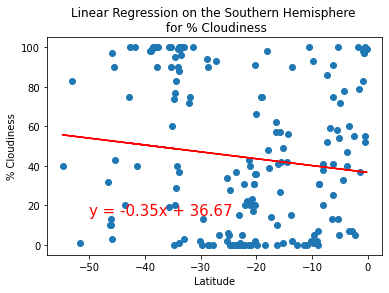

In [117]:
# Linear regression on the Southern Hemisphere for Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))



In [118]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.124


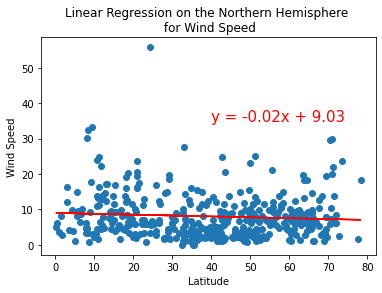

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [125]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.076


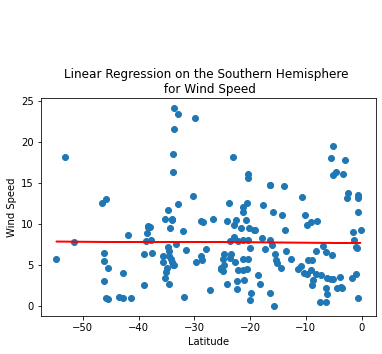

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))


In [127]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.008
